### Comparison of Optimizers using Rosenbrock Banana Function

### Name: Jose Aries E. De Los Santos

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [4]:
##Just Another Objective Function and its gradient for testing
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    return (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2

def grad(x):
  x1 = x[0].item()
  x2 = x[1].item()
  g11 = 4*(x1-1)**3 - 2*x2
  g12 = 10*(x2-1) - 2*x1
  return np.array([g11,g12])

##Initialize gradient threshold and maximum number of iterations
max_iter = int(3e+3); grad_threshold = 1e-5

## Define the Objective Function and its Gradients
$f(x_1,x_2) = 100*(x_2 - x_1^2)^2 + (1 - x_1)^2$

##Gradients of the Objective function
$\frac{\partial f}{\partial x_1} = -400x_1(x_2-x_1^2)-2(1-x_1)$

$\frac{\partial f}{\partial x_2} = 200(x_2-x_1^2)$

In [ ]:
#Create the Objective Function (Rosenbrock Function)
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

##Explicitly create the Gradient of the objective function
def grad(x):
  x1 = x[0].item()
  x2 = x[1].item()
  g11 = -400*x1*(x2-x1**2)-2*(1-x1)
  g12 = 200*(x2-x1**2)
  return np.array([g11,g12])


##Initialize gradient threshold and maximum number of iterations
max_iter = int(3e+3); grad_threshold = 1e-5

In [ ]:
#Rosenbrock Function for Multidimensional
def fun(x,a=100,b=1):
  n = x.shape[0]
  sum = 0
  for i in range(1,n):
    sum = sum + (a*(x[i]-x[i-1]**2)**2 + b*(x[i-1]-1)**2)
  return sum

def grad(x,a=100,b=1):
  grad = np.zeros_like(x)
  n = x.shape[0]
  for i in range(n):
    if i == 0:
      grad[i] = -4 * a * x[i] * (x[i+1] - x[i]**2) - 2 * b * (1 - x[i])
    elif i == n-1:
      grad[i] = 2 * a * (x[i] - x[i-1]**2)
    else:
      grad[i] = -4 * a * x[i] * (x[i+1] - x[i]**2) + 2 * a * (x[i+1] - x[i]**2) - 2 * b * (1 - x[i])
  return grad

In [ ]:
##Uniform sampling for the ball, this is for Pertubation
def generate_points_in_ball(center, radius, dimension, num_points):
    points = []

    for _ in range(num_points):
        point_on_circle = np.random.normal(0, 1, dimension)
        point_on_circle /= np.linalg.norm(point_on_circle)
        random_radius = np.random.uniform(0, radius)
        scaled_point = center + random_radius * point_on_circle
        points.append(scaled_point)

    return np.array(points)

## Using Inexact Line Search

In [22]:
##Steepest Descent

##Initialize Starting Point
# x0 = np.array([-1.2,-1.2])
x0 = np.array([0,0])

#Chosen Conditions for Backtracking Line Search Algorithm
alpha = 0.5; p = 0.3; c1 = 1e-5

iter = 0;
xdict = [];
costlist0 = [];

start_time1 = time.time()

while np.linalg.norm(grad(x0)) > grad_threshold and iter < max_iter:
  xdict.append(x0.copy())
  loss = fun(x0)
  costlist0.append(loss);
  g = -grad(x0)

  alpha = 0.9 #Reset 'a' using Backtracking Line Search
  #Backtracking Line Search with Armijo's Condition
  iter1 = 0
  while fun(x0 + alpha * g) > fun(x0) + c1 * alpha * np.dot(grad(x0).T, g):
    alpha = p*alpha
    iter1 = iter1 + 1
  x = x0 + alpha * g.T
  x0 = x
  iter = iter + 1

end_time1 = time.time()

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]

print("Optimal solution:", x0)
print("Number of Iterations:", iter)
print("Function Value is:", fun(x0))
print("Time taken for convergence:", end_time1 - start_time1, "seconds")

Optimal solution: [1.88292528 1.37658451]
Number of Iterations: 14
Function Value is: -3.8672228877080728
Time taken for convergence: 0.0016281604766845703 seconds


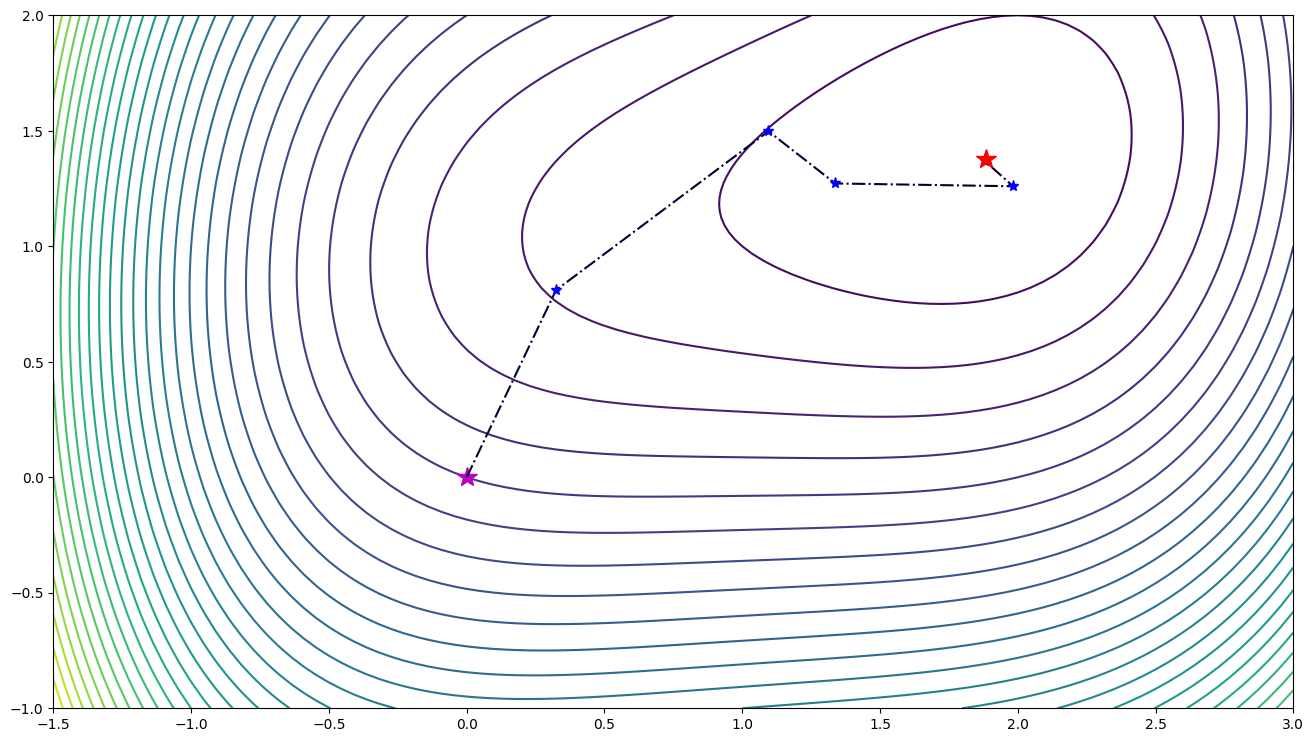

In [23]:
# def fplot(x1, x2):
#     return 100*(x2-x1**2)**2 + (1-x1)**2
def fplot(x1,x2):
  return (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2
plt.subplots(figsize=(16,9))
x_ = np.linspace(-1.5,3,100); y_ = np.linspace(-1,2,100)
X,Y = np.meshgrid(x_,y_)
contplot = plt.contour(X,Y,fplot(X,Y),30)
plt.plot(xdict[0, 0], xdict[0, 1], "m*",markersize=15,label="Starting Point")
plt.plot(xdict1,xdict2,color="#000033",ls="-.",lw=1.5)
for i in range(1,np.size(xdict1)):
    plt.plot(xdict1[i],xdict2[i],"b*",markersize=8)
plt.plot(x0[0],x0[1],"r*", markersize=15,label="Optimal")
plt.show()

In [ ]:
##Gradient Descent with Momentum

##Initialize Starting Point
x0m = np.array([-1.2, -1.2])

#Chosen Conditions for Backtracking Line Search Algorithm
alpha = 0.5; p = 0.3; c1 = 1e-5

##For momentum
beta = 0.9; v = np.zeros_like(x0m);

iterm = 0;
xdict = [];
costlist1 = [];

start_time2 = time.time()

while np.linalg.norm(grad(x0m)) > grad_threshold and iterm < max_iter:
  xdict.append(x0m.copy())
  loss = fun(x0m);
  costlist1.append(loss)
  g = -grad(x0m)
  dx = np.zeros_like(x0m)
  dx = dx + g
  v = beta*v + (1-beta)*dx ##Momentum
  alpha = 0.1 #Reset 'a' using Backtracking Line Search
  #Backtracking Line Search with Armijo's Condition
  iter1 = 0
  # while fun(x0m + alpha * v) > fun(x0m) + c1 * alpha * np.dot(grad(x0m).T, v):
  while fun(x0m + alpha * g) > fun(x0m) + c1 * alpha * np.dot(grad(x0m).T, g):
    alpha = p*alpha
    iter1 = iter1 + 1
  x = x0m + alpha * v
  x0m = x
  iterm = iterm + 1

end_time2 = time.time()

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]

print("Optimal solution:", x0m)
print("Number of Iterations:", iterm)
print("Function Value is:", fun(x0m))
print("Time taken for convergence:", end_time2 - start_time2, "seconds")

Optimal solution: [1.81338569 3.28742842]
Number of Iterations: 3000
Function Value is: 0.6616845070916423
Time taken for convergence: 0.8728516101837158 seconds


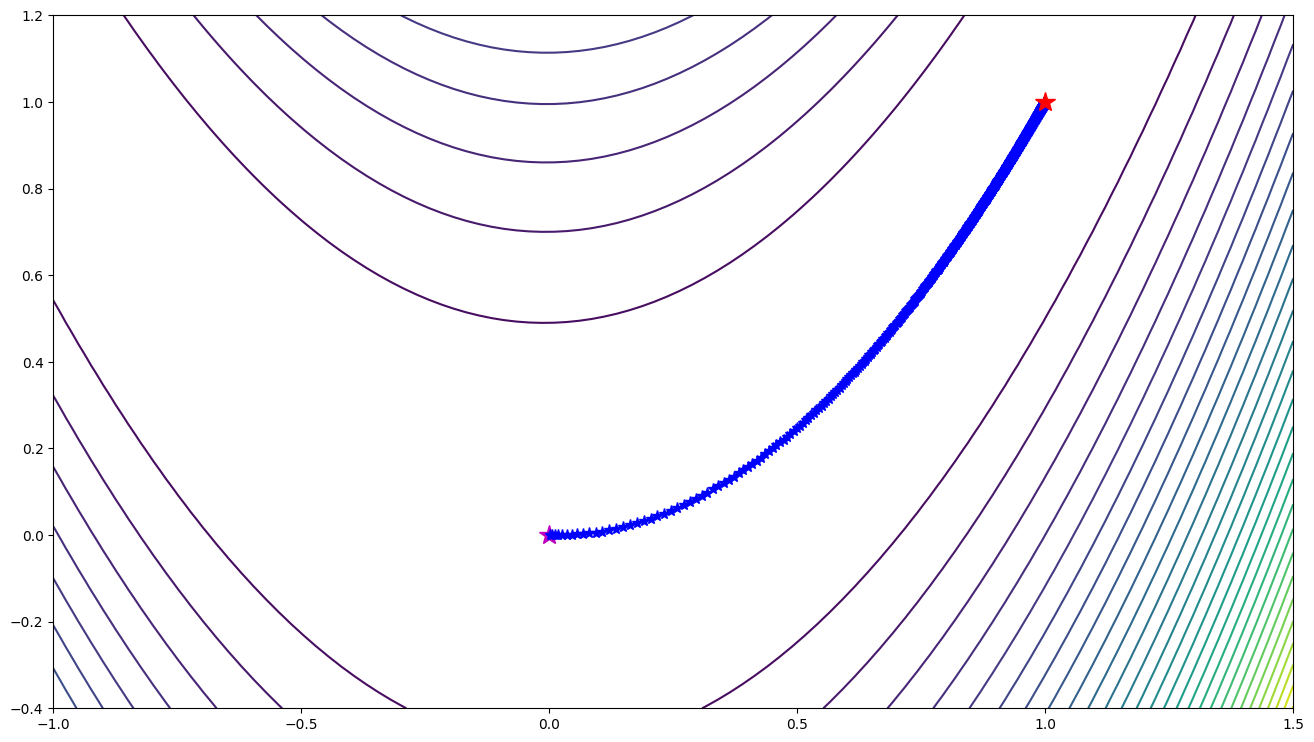

In [ ]:
def fplot(x1, x2):
    return 100*(x2-x1**2)**2 + (1-x1)**2
plt.subplots(figsize=(16,9))
x_ = np.linspace(-1,1.5,100); y_ = np.linspace(-0.4,1.2,100)
X,Y = np.meshgrid(x_,y_)
contplot = plt.contour(X,Y,fplot(X,Y),30)
plt.plot(xdict[0, 0], xdict[0, 1], "m*",markersize=15,label="Starting Point")
plt.plot(xdict1,xdict2,color="#000033",ls="-.",lw=1.5)
for i in range(1,np.size(xdict1)):
    plt.plot(xdict1[i],xdict2[i],"b*",markersize=8)
plt.plot(x0m[0],x0m[1],"r*", markersize=15,label="Optimal")
plt.show()

In [14]:
##Root Mean Squared Propagation

##Initialize Starting Point
x0s = np.array([0, 0])

#Chosen Conditions for Backtracking Line Search Algorithm
alpha = 0.5; p = 0.3; c1 = 1e-5

#Chosen parameters for RMSprop
eps = 1e-8; beta = 0.9; sd = np.zeros_like(x0s);

iterrms = 0;
xdict = [];
costlist2 = [];

start_time = time.time()
while np.linalg.norm(grad(x0s)) > grad_threshold and iterrms < max_iter:
  loss = fun(x0s)
  costlist2.append(loss);
  xdict.append(x0s)
  g = -grad(x0s)
  sd = beta*sd + (1-beta)*((g)**2)
  # sdhat = sd/(1-beta**t) if 1-beta**t != 0 else 0 ##RMSprop bias corrector

  alpha = 0.9 #Reset 'a' using Backtracking Line Search
  #Backtracking Line Search with Armijo's Condition
  iter1 = 0
  while fun(x0s + alpha*g) > fun(x0s) + c1 * alpha * np.dot(grad(x0s).T, g):
    alpha = p*alpha
    iter1 = iter1 + 1
  x = x0s + alpha *(1/np.sqrt(sd+eps))*g.T
  x0s = x
  iterrms = iterrms + 1

end_time = time.time()

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]


print("Optimal solution:", x0s)
print("Number of Iterations:", iterrms)
print("Function Value is:", fun(x0s))
print("Time taken for convergence:", end_time - start_time, "seconds")

Optimal solution: [1.88292596 1.37658474]
Number of Iterations: 32
Function Value is: -3.867222887711651
Time taken for convergence: 0.00439143180847168 seconds


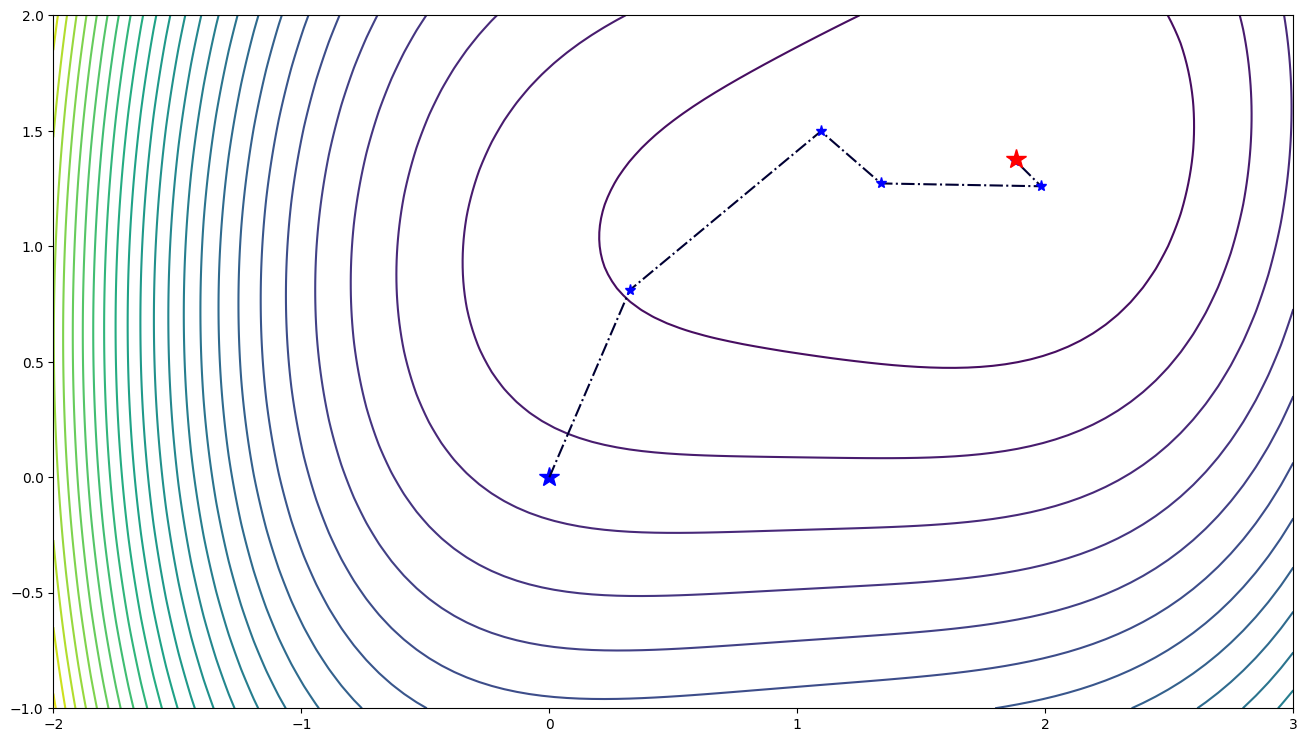

In [26]:
# def fplot(x1, x2):
#     return 100*(x2-x1**2)**2 + (1-x1)**2
def fplot(x1,x2):
  return (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2
plt.subplots(figsize=(16,9))
x_ = np.linspace(-2,3,100); y_ = np.linspace(-1,2,100)
X,Y = np.meshgrid(x_,y_)
contplot = plt.contour(X,Y,fplot(X,Y),30)
plt.plot(xdict[0, 0], xdict[0, 1], "b*",markersize=15,label="Starting Point")
plt.plot(xdict1,xdict2,color="#000033",ls="-.",lw=1.5)
for i in range(1,np.size(xdict1)):
    plt.plot(xdict1[i],xdict2[i],"b*",markersize=8)
plt.plot(x0s[0],x0s[1],"r*", markersize=15,label="Optimal")
plt.show()

In [ ]:
##Adaptive Moment Estimation

##Initialize Starting Point
x0a = np.array([0,0])

#Chosen Conditions for Backtracking Line Search Algorithm
p = 0.3; c1 = 1e-5

##For ADAM
beta1 = 0.9; v = np.zeros_like(x0a); beta2 = 0.99; sd = np.zeros_like(x0a); eps = 1e-7

##For the Perturbation
radius = 1;

itera = 0;
xdict = [];
costlist3 = [];

start_time = time.time()
t = 0
while np.linalg.norm(grad(x0a)) > grad_threshold and itera < 3000:
  xdict.append(x0a.copy())
  loss = fun(x0a);
  costlist3.append(loss)
  g = -grad(x0a)
  v = beta1*v + (1-beta1)*g ##Momentum
  vhat = v/(1-beta1**t) if 1-beta1**t != 0 else 0 ##Momentum bias corrector
  sd = sd*beta2 + (1-beta2)*((g)**2) ##RMSprop
  sdhat = sd/(1-beta2**t) if 1-beta2**t != 0 else 0 ##RMSprop bias corrector
  t = t + 1

  alpha = 0.01 #Reset 'a' using Backtracking Line Search
  #Backtracking Line Search with Armijo's Condition
  iter1 = 0
  while fun(x0a + alpha * g) > fun(x0a) + c1 * alpha * np.dot(grad(x0a).T, g):
    alpha = p*alpha
    iter1 = iter1 + 1

  #Gradient Descent Update
  x = x0a + alpha * (vhat/(np.sqrt(sdhat)+eps))
  x0a = x
  itera = itera + 1
end_time = time.time()

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]

print("Optimal solution:", x0a)
print("Number of Iterations:", itera)
print("Function Value is:", fun(x0a))
print("Time taken for convergence:", end_time - start_time, "seconds")

Optimal solution: [0.99999961 0.99999921]
Number of Iterations: 1359
Function Value is: 1.5568072229562474e-13
Time taken for convergence: 0.16215944290161133 seconds


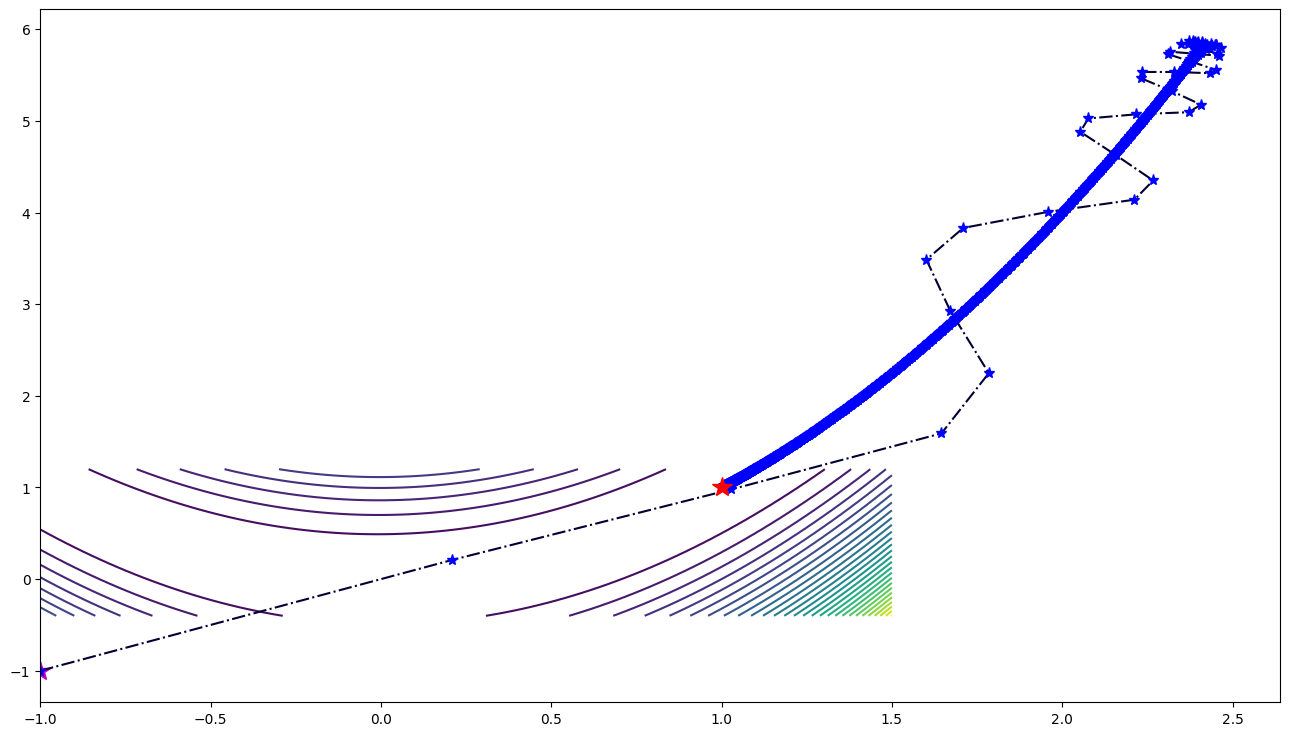

In [ ]:
def fplot(x1, x2):
    return 100*(x2-x1**2)**2 + (1-x1)**2
plt.subplots(figsize=(16,9))
x_ = np.linspace(-1,1.5,100); y_ = np.linspace(-0.4,1.2,100)
X,Y = np.meshgrid(x_,y_)
contplot = plt.contour(X,Y,fplot(X,Y),30)
plt.plot(xdict[0, 0], xdict[0, 1], "m*",markersize=15,label="Starting Point")
plt.plot(xdict1,xdict2,color="#000033",ls="-.",lw=1.5)
for i in range(1,np.size(xdict1)):
    plt.plot(xdict1[i],xdict2[i],"b*",markersize=8)
plt.plot(x0a[0],x0a[1],"r*", markersize=15,label="Optimal")
plt.show()

In [ ]:
# @title Nesterov Momentum
##Nesterov Acceleration

##Initialize Starting Point
x0n = np.array([0,0])
# y = x0n

#Chosen Conditions for Backtracking Line Search Algorithm
p = 0.3; c1 = 1e-5

##For momentum
beta = 0.5;
# v = np.zeros_like(x0n);
v0 = np.ones_like(x0n)
# v0 = 1/(1-beta)

itern = 0;
xdict = [];
costlist4 = [];

start_time4 = time.time()

while np.linalg.norm(grad(x0n)) > grad_threshold and itern < max_iter:
  xdict.append(x0n.copy())
  loss = fun(x0n);
  costlist4.append(loss)
  g = -grad(x0n)
  alpha = 0.001 #Reset 'a' using Backtracking Line Search
  #Backtracking Line Search with Armijo's Condition
  iter1 = 0
  while fun(x0n + alpha * g) > fun(x0n) + c1 * alpha * np.dot(grad(x0n).T, g):
    alpha = p*alpha
    iter1 = iter1 + 1
  # Nesterov's Acceleration Part 1
  # v = beta * v - alpha*grad(x0n+beta*v)
  # x = x0n + v

  # Nesterov's Acceleration Part 2
  # x = y - alpha*grad(y)
  # y = x + beta*(x-x0n)
  # x0n = x

  #Nesterov Acceleration [Jin et al (2018)]
  y = x0n + (1-beta)*v0
  x = y - alpha*grad(y)
  v = x - x0n
  x0n = x
  v0 = v
  itern = itern + 1
end_time4 = time.time()

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]

print("Optimal solution:", x0n)
print("Number of Iterations:", itern)
print("Function Value is:", fun(x0n))
print("Time taken for convergence:", end_time4 - start_time4, "seconds")

Optimal solution: [0.9983771  0.99675033]
Number of Iterations: 3000
Function Value is: 2.638034339738288e-06
Time taken for convergence: 0.23569798469543457 seconds


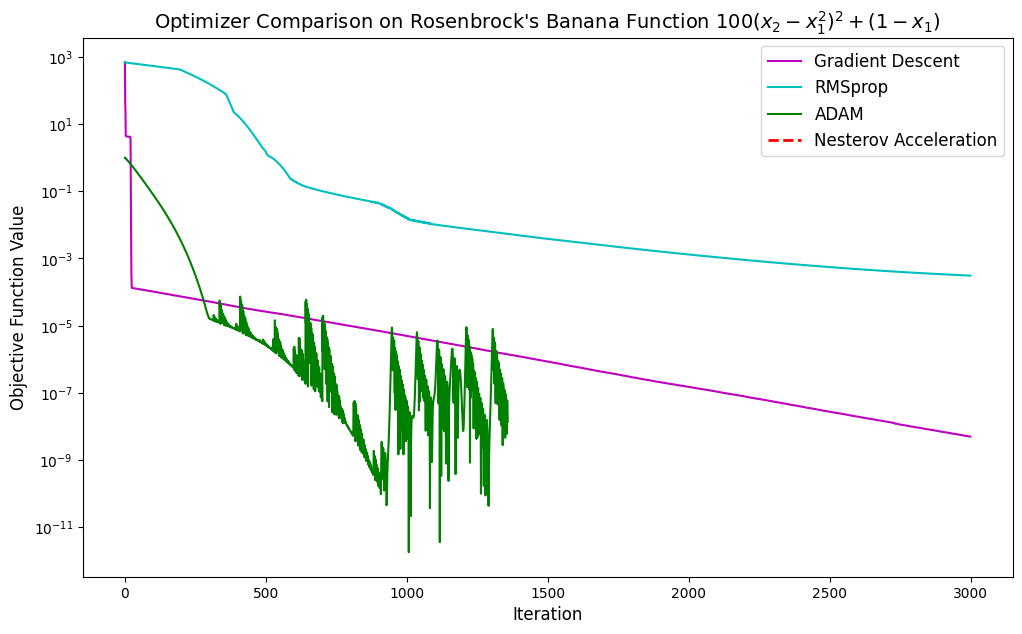

In [ ]:
plt.subplots(figsize=(12,7))
plt.yscale('log')
plt.ylabel('Objective Function Value',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
t = np.arange(0,iter);
tm = np.arange(0,iterm);
trms = np.arange(0,iterrms)
ta = np.arange(0,itera);
tnes = np.arange(0,itern);
plt.plot(t,costlist0,"m",label="Gradient Descent")
# plt.plot(tm,costlist1,"b",label="Momentum",linewidth=3.0)
plt.plot(trms,costlist2,"c",label="RMSprop")
plt.plot(ta,costlist3,"g",label="ADAM")
plt.plot(tnes,costlist4,"r--", label="Nesterov Acceleration",linewidth=2.0)
plt.title('Optimizer Comparison on Rosenbrock\'s Banana Function $100(x_2-x_1^2)^2 + (1-x_1)$',fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [ ]:
##Accuracy Comparison

##True solution and the true value of the Rosenbrock Function
truesol = np.array([1,1]); actual_val = 0;

print("Absolute Error in Solution")
print("----"*100)
print("Error from Gradient Descent", truesol- x0)
print("Error from Gradient Descent with Momentum", truesol-x0m)
print("Error from Root Mean Squared Propagation", truesol-x0s)
print("Error from Adaptive Moment Estimation", truesol-x0a)
print("Error from Nesterov Momentum", truesol-x0n)
print("----"*100)
print("\n\n\n")
print("Absolute Error in Actual Value of the Objective Function")
print("----"*100)
print("Error from Gradient Descent", np.abs(actual_val- fun(x0)))
print("Error from Gradient Descent with Momentum", np.abs(actual_val- fun(x0m)))
print("Error from Root Mean Squared Propagation", np.abs(actual_val- fun(x0s)))
print("Error from Adaptive Moment Estimation", np.abs(actual_val- fun(x0a)))
print("Error from Nesterov Momentum", np.abs(actual_val- fun(x0n)))
print("----"*100)


Absolute Error in Solution
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Error from Gradient Descent [0.00156143 0.00313532]
Error from Gradient Descent with Momentum [1.11666420e-05 2.23778441e-05]
Error from Root Mean Squared Propagation [0.00745922 0.01354216]
Error from Adaptive Moment Estimation [9.86591386e-06 1.97618052e-05]
Error from Nesterov Momentum [2.49913546e-06 5.01285201e-06]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Colab\ Notebooks/Math\ 288/Optimizers\ Comparison\ Test.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab Notebooks/Math 288/Optimizers Comparison Test.ipynb to html
[NbConvertApp] Writing 2054485 bytes to /content/drive/MyDrive/Colab Notebooks/Math 288/Optimizers Comparison Test.html


In [ ]:
cc = np.array([3,4])
np.linalg.norm(cc)

5.0

In [ ]:
import numpy as np

def generate_points_in_ball(center, radius, dimension, num_points):
    """
    Generate uniformly sampled points within a ball in R^d.

    Parameters:
    - center: The center of the ball (numpy array).
    - radius: The radius of the ball.
    - dimension: The dimension of the space (d).
    - num_points: The number of points to generate.

    Returns:
    - points: An array containing the generated points.
    """
    points = []

    for _ in range(num_points):
        # Generate random point on the unit sphere
        point_on_sphere = np.random.normal(0, 1, dimension)
        point_on_sphere /= np.linalg.norm(point_on_sphere)

        # Scale the point to lie within the ball
        random_radius = np.random.uniform(0, 1) ** (1/dimension)
        scaled_point = center + radius * random_radius * point_on_sphere

        points.append(scaled_point)

    return np.array(points)

# Example usage:
center = np.array([0, 0])
radius = 1
dimension = 2
num_points = 10

points_in_ball = generate_points_in_ball(center, radius, dimension, num_points)
print("Generated points in the ball:")
print(points_in_ball)


Generated points in the ball:
[[ 0.26874786 -0.9299662 ]
 [ 0.71265779 -0.68797487]
 [-0.44168837  0.81746062]
 [ 0.18765222  0.97862457]
 [-0.71379784  0.02018216]
 [ 0.0918104   0.81251871]
 [-0.14031944 -0.07683213]
 [ 0.20688099 -0.96231156]
 [ 0.89184206 -0.19399046]
 [-0.06272289 -0.7560939 ]]


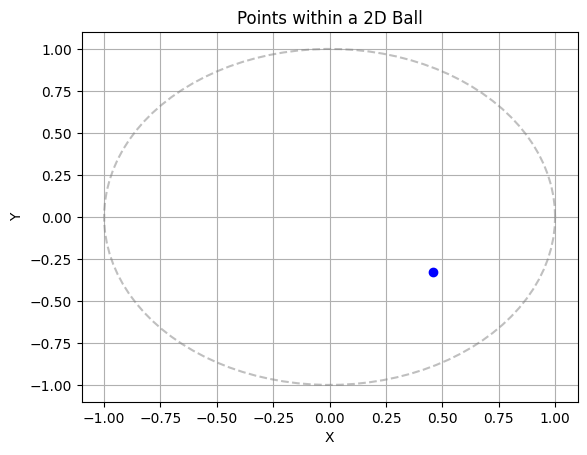

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points_in_ball(center, radius, dimension, num_points):
    points = []

    for _ in range(num_points):
        point_on_circle = np.random.normal(0, 1, dimension)
        point_on_circle /= np.linalg.norm(point_on_circle)
        random_radius = np.random.uniform(0, radius)
        scaled_point = center + random_radius * point_on_circle
        points.append(scaled_point)

    return np.array(points)

# Example usage:
center = np.array([0, 0])
radius = 1
dimension = 2
num_points = 1

points_in_ball = generate_points_in_ball(center, radius, dimension, num_points)
zeta = generate_points_in_ball(center, radius, dimension, num_points)

# Plotting the points in 2D
plt.scatter(points_in_ball[:, 0], points_in_ball[:, 1], c='blue', marker='o')

# Plot the circle
theta = np.linspace(0, 2*np.pi, 100)
circle_x = center[0] + radius * np.cos(theta)
circle_y = center[1] + radius * np.sin(theta)
plt.plot(circle_x, circle_y, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points within a 2D Ball')
plt.grid(True)
plt.show()


In [ ]:
zeta

array([[0.22113892, 0.77718574]])